In [163]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

# **Load the Data**

In [164]:
df = pd.read_csv('USD_LKR Historical Data.csv')

In [165]:
df.head()

,Date,Price
0,5/25/2023,302.0
1,5/26/2023,297.0
2,5/29/2023,296.0
3,5/30/2023,294.0
4,5/31/2023,290.0


<AxesSubplot:>

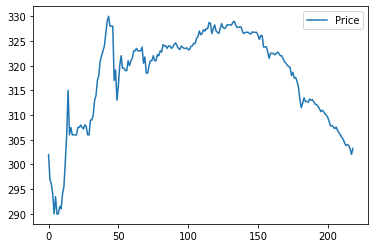

In [166]:
# ploting the dataframe
df.plot()

# **Stationary Test using adfuller**

In [167]:
# importing adfuller
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Price'])

In [168]:
# creating function to check the stationarity
def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test statistic','p-value','#Lags Used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] < 0.05:
        print("Not Stationary")
    else:
        print("It's stationary")

**test outcome**

In [169]:
 adfuller_test(df['Price'])

ADF Test statistic : -2.177715526572247
p-value : 0.214432610687199
#Lags Used : 2
Number of observations used : 216
It's stationary


# ```Ploting acf & pacf```

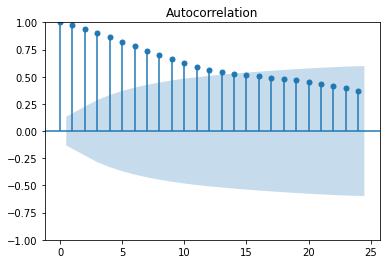

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


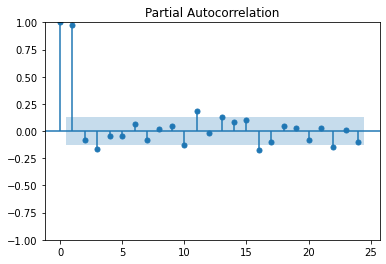

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df['Price'])
plt.show()

# Plot PACF
plot_pacf(df['Price'])
plt.show()


# **Model Building**

In [171]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Import today's date from code
todays_date = datetime.today().date()

# Read the CSV file into a DataFrame
df = pd.read_csv('USD_LKR Historical Data.csv', parse_dates=['Date'], index_col='Date')

order = (1, 0, 1)

# Fit ARIMA model
model = ARIMA(df['Price'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Print the predicted exchange rate for today
print("Predicted Exchange Rate for Today:", forecast_values.iloc[-1])

# Calculate the residuals (difference between actual and predicted values)
residuals = df['Price'] - results.fittedvalues

# Calculate the Mean Absolute Error (MAE)
mae = abs(residuals).mean()

# Calculate the Mean Squared Error (MSE)
mse = (residuals ** 2).mean()

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  219
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -435.336
Date:                Mon, 25 Mar 2024   AIC                            878.673
Time:                        18:24:59   BIC                            892.229
Sample:                             0   HQIC                           884.148
                                - 219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.2741      8.599     36.197      0.000     294.420     328.128
ar.L1          0.9879      0.012     82.548      0.000       0.964       1.011
ma.L1         -0.0372      0.031     -1.196      0.2

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Import today's date from code
todays_date = datetime.today().date()

# Read the CSV file into a DataFrame
df = pd.read_csv('USD_LKR Historical Data.csv', parse_dates=['Date'], index_col='Date')

order = (1, 0, 1)

# Fit ARIMA model
model = ARIMA(df['Price'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 7 days from today's date
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
predictions = []
# Print the predicted exchange rates for the next 7 days
print("Predicted Exchange Rates for the Next 7 Days:")
for i in range(forecast_steps):
   prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
   print(f"{prediction_date}: {forecast_values.iloc[i]}")
   predictions.append(forecast_values.iloc[i])

# ... (rest of your code for evaluation metrics) ...


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  219
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -435.336
Date:                Mon, 25 Mar 2024   AIC                            878.673
Time:                        18:25:00   BIC                            892.229
Sample:                             0   HQIC                           884.148
                                - 219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.2741      8.599     36.197      0.000     294.420     328.128
ar.L1          0.9879      0.012     82.548      0.000       0.964       1.011
ma.L1         -0.0372      0.031     -1.196      0.2

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [173]:

# Create an IntSlider widget for the number of days
days_input = int(input("Enter the number of days ( 1 - 7 ): "))

# Create a FloatText widget for the product price
price_input =float(input("Enter the product price in LKR: "))



daily_increases = [predictions[i + 1] - predictions[i] for i in range(days_input - 1)]

# Calculate daily increase rates as percentages
daily_increase_rates = [increase / predictions[i] * 100 for i, increase in enumerate(daily_increases)]

total_increase = sum(daily_increases)
total_increase_rate = total_increase / predictions[0] * 100
print(total_increase_rate)

print("New price in ",days_input," days  : ",price_input/100*total_increase_rate + price_input)



0.1848866337985032
New price in  7  days  :  100.1848866337985
